In [17]:
import numpy as np
import pandas as pd
import ancilliary_funcs as anc
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [18]:
dataframe = pd.read_csv('subsample_SN_demo.csv')
df = dataframe.drop(['Unnamed: 0'],axis=1)

# Requerimiento 2

    Cantidad de datos perdidos de la muestra importada

In [19]:
lista_variables = ['undp_hdi', 'gle_cgdpc', 'imf_pop', 'wef_imort', 'who_alc2000', 'who_tobt', 'wdi_exph']
for variable in lista_variables:
    datos_perdidos, porcentaje_perdidos = anc.missing_data(dataframe=df, var=variable, print_list=False)
    print(variable,':', datos_perdidos)

undp_hdi : 4
gle_cgdpc : 1
imf_pop : 25
wef_imort : 22
who_alc2000 : 7
who_tobt : 36
wdi_exph : 2


# Requerimiento 3

In [20]:
def get_zscore(dataframe, column, case):
    get_point = dataframe[dataframe['gle_cgdpc'] == case][column]
    get_mean = dataframe[column].dropna().mean()
    get_std = dataframe[column].dropna().std()
    return (get_point - get_mean) / get_std

# Dataframe para variable en estudio. Se eliminan las observaciones con datos perdidos
df_dropna_gle_cgdpc = df.dropna(subset='gle_cgdpc').copy()

# Agregamos el puntaje z a la nueva columna zscore_gle_cgdpc
for index, serie in df_dropna_gle_cgdpc['gle_cgdpc'].items():
    zscore = get_zscore(df_dropna_gle_cgdpc, 'gle_cgdpc', serie)[index]
    df_dropna_gle_cgdpc.at[index, 'zscore_gle_cgdpc'] = zscore

# Ordenamos el df de menor a mayor según el puntaje z
df_gle_cgdpc_sorted = df_dropna_gle_cgdpc.sort_values(by='zscore_gle_cgdpc', ascending=True)
df_gle_cgdpc_sorted

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,zscore_gle_cgdpc
16,0.351,NER,SubSaharian,644.53998,NaN,NaN,0.15,8.400000,5.821299,-0.838288
93,0.511,MDG,SubSaharian,822.62000,NaN,40.900002,0.87,NaN,3.041355,-0.829411
35,0.473,MWI,SubSaharian,938.34998,17.604,46.000000,1.23,16.299999,11.377956,-0.823642
12,0.431,SLE,SubSaharian,979.95001,6.232,117.400002,3.78,34.400002,11.089902,-0.821569
83,0.414,GIN,SubSaharian,993.83002,11.745,65.199997,0.22,NaN,5.644798,-0.820877
...,...,...,...,...,...,...,...,...,...,...
30,0.948,NOR,WesternDem,57634.77000,5.156,2.200000,6.06,24.100000,9.719718,2.002576
77,0.896,LUX,WesternDem,61404.48000,0.550,1.700000,11.12,24.400000,6.937873,2.190490
82,0.799,KWT,NorthAfrica,64342.71100,3.999,9.500000,0.02,NaN,3.042368,2.336956
27,0.911,LIE,WesternDem,102243.52000,NaN,NaN,NaN,NaN,NaN,4.226245


    Primeras y últimas 10 observaciones

In [21]:
df_gle_cgdpc_sorted.head(10)

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,zscore_gle_cgdpc
16,0.351,NER,SubSaharian,644.53998,NaN,NaN,0.15,8.400000,5.821299,-0.838288
93,0.511,MDG,SubSaharian,822.62000,NaN,40.900002,0.87,NaN,3.041355,-0.829411
35,0.473,MWI,SubSaharian,938.34998,17.604000,46.000000,1.23,16.299999,11.377956,-0.823642
12,0.431,SLE,SubSaharian,979.95001,6.232000,117.400002,3.78,34.400002,11.089902,-0.821569
83,0.414,GIN,SubSaharian,993.83002,11.745000,65.199997,0.22,NaN,5.644798,-0.820877
34,0.418,ERI,SubSaharian,1007.28000,NaN,NaN,0.62,NaN,3.338293,-0.820206
42,0.490,HTI,LatAm,1024.93990,NaN,56.500000,5.68,11.800000,7.555654,-0.819326
85,0.479,AFG,SouthAsia,1282.64000,29.825001,NaN,0.01,NaN,8.182274,-0.806480
8,0.481,BEN,SubSaharian,1413.05000,10.320000,56.200001,1.40,8.800000,4.594296,-0.799979
61,0.519,TZA,SubSaharian,1416.30000,43.880001,37.700001,4.20,16.299999,5.580116,-0.799817


In [22]:
df_gle_cgdpc_sorted.tail(10)

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,zscore_gle_cgdpc
28,NaN,SMR,WesternDem,42664.211,0.034000,NaN,NaN,NaN,6.129065,1.256320
63,0.864,BRN,SouthEastAsia,46103.840,0.412000,5.6,0.97,16.400000,2.648163,1.427779
50,0.920,IRL,WesternDem,46422.070,4.621000,3.4,10.75,23.200001,7.783196,1.443643
81,0.918,USA,WesternDem,47769.699,318.789001,6.0,8.82,18.100000,17.140755,1.510820
20,0.924,SGP,SouthEastAsia,54268.148,5.470000,2.3,1.83,16.200001,4.922792,1.834756
30,0.948,NOR,WesternDem,57634.770,5.156000,2.2,6.06,24.100000,9.719718,2.002576
77,0.896,LUX,WesternDem,61404.480,0.550000,1.7,11.12,24.400000,6.937873,2.190490
82,0.799,KWT,NorthAfrica,64342.711,3.999000,9.5,0.02,NaN,3.042368,2.336956
27,0.911,LIE,WesternDem,102243.520,NaN,NaN,NaN,NaN,NaN,4.226245
2,0.855,QAT,NorthAfrica,104049.440,2.045000,6.3,1.15,NaN,2.187062,4.316267


# Requerimiento 4

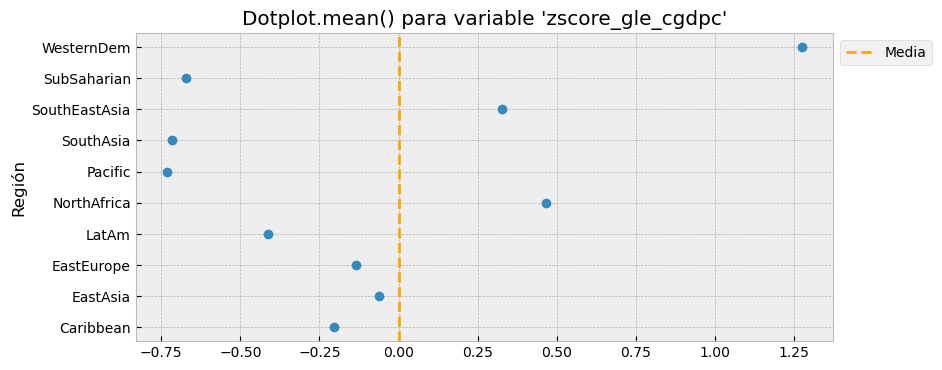

In [23]:
anc.dotplot_graphic(dataframe=df_gle_cgdpc_sorted, plot_var='zscore_gle_cgdpc', plot_by='ht_region', statistic='mean',global_stat=True)

# Requerimiento 5

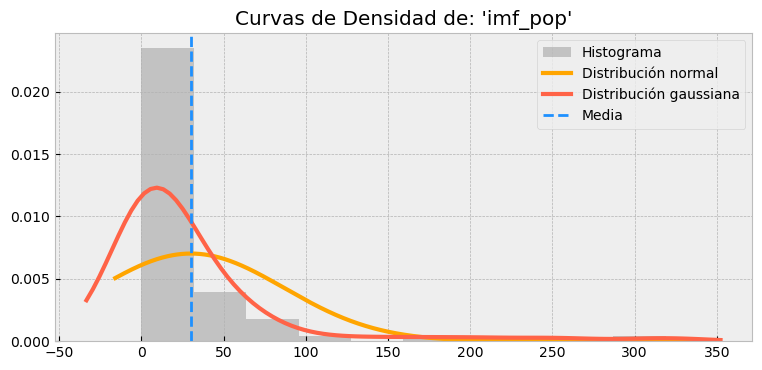

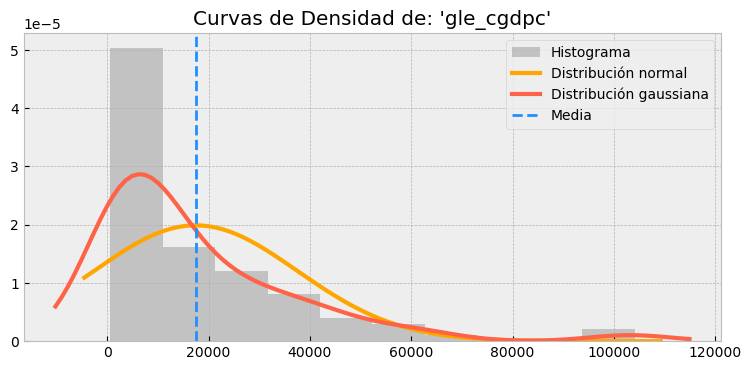

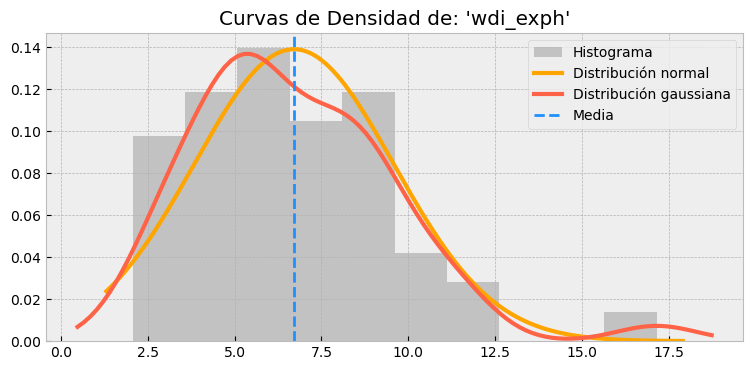

In [24]:
import scipy.stats as stats
from scipy.stats import gaussian_kde
from scipy.stats import norm

def pr_density_(df, variable):
    df_dropna = df[variable].dropna().copy()
    plt.figure(figsize=(9,4))
    plt.title(f"Curvas de Densidad de: '{variable}'")

    # Graficamos el histograma 
    plt.hist(df_dropna, color='grey', alpha=.4, density=True, label=f"Histograma")
    plt.legend(loc='best')

    # Graficamos la distribución normal
    mu = df_dropna.mean()
    sigma = df_dropna.var()
    x_min, x_max = plt.xlim()
    x_axis = np.linspace(x_min, x_max, 1000)
    simulate_normal_pdf = norm.pdf(x_axis, mu, np.sqrt(sigma))
    plt.plot(x_axis, simulate_normal_pdf, color='orange', lw=3, label=f"Distribución normal")
    plt.legend(loc='best')

    # Extraemos los límites del histograma
    x_min, x_max = plt.xlim()
    x_axis = np.linspace(x_min, x_max, 100)
    gauss_kde = stats.gaussian_kde(df_dropna) # Kernel gaussiano
    Z = np.reshape(gauss_kde(x_axis).T, x_axis.shape)
    plt.plot(x_axis, Z, color='tomato', lw=3, label=f"Distribución gaussiana", )
    plt.legend(loc='best')
    plt.axvline(df_dropna.mean(), color='dodgerblue', linestyle='--', lw=2, label=f"Media")
    plt.legend(loc='best')
    


variables = ['imf_pop', 'gle_cgdpc', 'wdi_exph']
for variable in variables:
    pr_density_(df,variable)